In [4]:
import alpaca_trade_api as tradeapi
import os 

# Replace with your Sandbox API Key and Secret
API_KEY = os.getenv("alpaca_api_key")
API_SECRET = os.getenv("alpaca_secret")
BASE_URL = "https://paper-api.alpaca.markets"

# Initialize API connection
api = tradeapi.REST(API_KEY, API_SECRET, BASE_URL, api_version="v2")

# Test API connection
account = api.get_account()
print("Account Status:", account.status)  # Should return "ACTIVE" if working


Account Status: ACTIVE


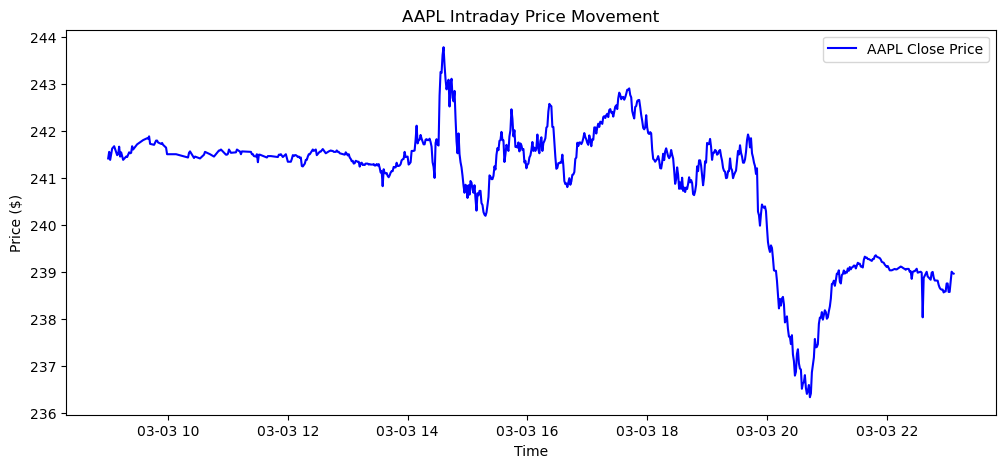

,close,high,low,trade_count,open,volume,vwap
timestamp,,,,,,,
2025-03-03 09:00:00+00:00,241.41,241.62,241.13,158,241.62,4558,241.330742
2025-03-03 09:01:00+00:00,241.55,241.57,241.41,145,241.48,2115,241.496056
2025-03-03 09:02:00+00:00,241.38,241.38,241.36,81,241.36,1603,241.374802
2025-03-03 09:03:00+00:00,241.50,241.54,241.47,90,241.47,1712,241.496280
2025-03-03 09:04:00+00:00,241.62,241.62,241.59,48,241.60,1105,241.604044
...,...,...,...,...,...,...,...
2025-03-03 23:02:00+00:00,238.57,238.57,238.57,4,238.57,189,238.570000
2025-03-03 23:03:00+00:00,238.57,238.65,238.56,37,238.65,2480,238.575195
2025-03-03 23:05:00+00:00,239.00,239.00,238.56,63,238.56,4166,238.848599


In [ ]:

import pandas as pd
import matplotlib.pyplot as plt

# Fetch 1-minute intraday data for AAPL
symbol = "AAPL"
timeframe = "1Min"
bars = api.get_bars(symbol, timeframe, limit=1000).df


# Plot AAPL Price
plt.figure(figsize=(12, 5))
plt.plot(bars.index, bars["close"], label="AAPL Close Price", color="blue")
plt.title("AAPL Intraday Price Movement")
plt.xlabel("Time")
plt.ylabel("Price ($)")
plt.legend()
plt.show()

bars

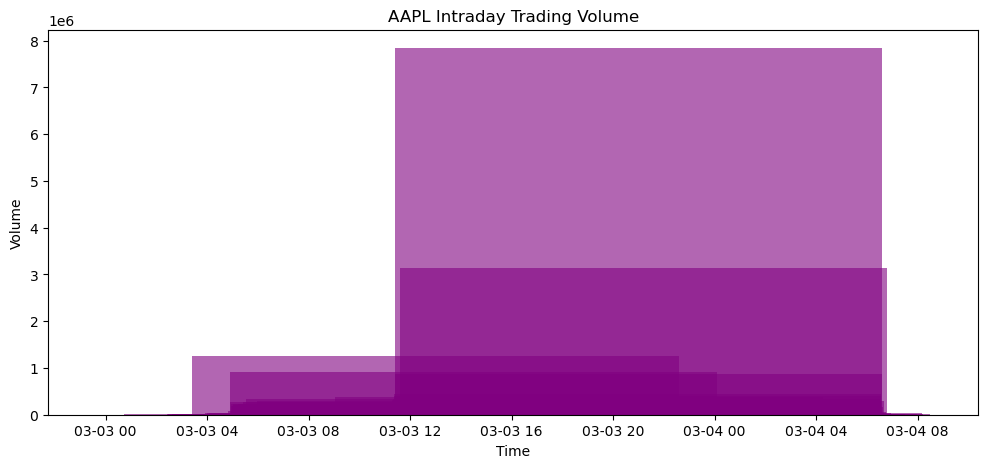

In [21]:
plt.figure(figsize=(12, 5))
plt.bar(bars.index, bars["volume"], color="purple", alpha=0.6)
plt.title("AAPL Intraday Trading Volume")
plt.xlabel("Time")
plt.ylabel("Volume")
plt.show()

Raw Price Data:
                                AAPL   MSFT
timestamp                                 
2025-03-03 09:00:00+00:00  241.5000  397.7
2025-03-03 10:00:00+00:00  241.4900  397.5
2025-03-03 11:00:00+00:00  241.5000  397.9
2025-03-03 12:00:00+00:00  241.5100  399.0
2025-03-03 13:00:00+00:00  241.4394  398.8
Returns Data:
                                AAPL      MSFT
timestamp                                    
2025-03-03 10:00:00+00:00 -0.000041 -0.000503
2025-03-03 11:00:00+00:00  0.000041  0.001006
2025-03-03 12:00:00+00:00  0.000041  0.002765
2025-03-03 13:00:00+00:00 -0.000292 -0.000501
2025-03-03 14:00:00+00:00 -0.002565 -0.012914


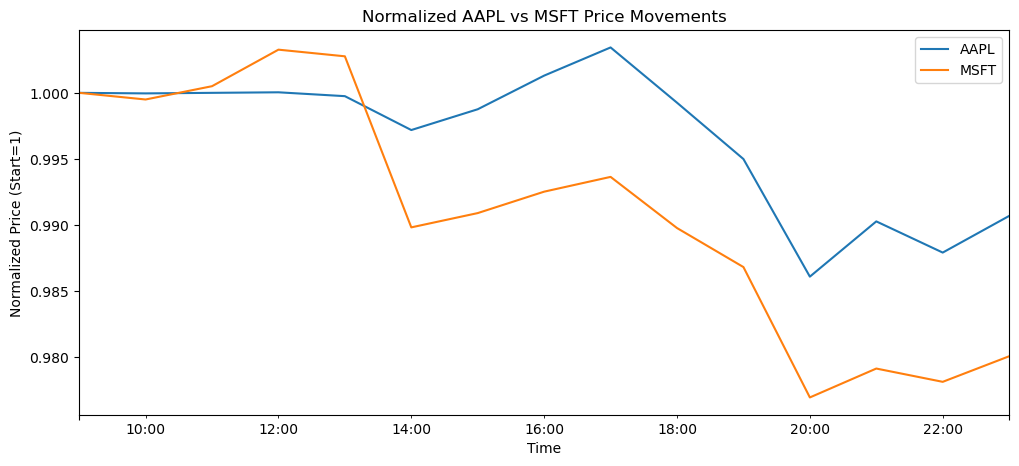

Correlation between AAPL and MSFT: 0.7650


In [40]:
# ✅ Fetch 1H close prices for AAPL & MSFT
symbols = ["AAPL", "MSFT"]
timeframe = "1H"

data = {symbol: api.get_bars(symbol, timeframe, limit=1000).df["close"] for symbol in symbols}
df = pd.DataFrame(data).dropna()  # Ensure timestamps match

# ✅ Check raw price data
print("Raw Price Data:\n", df.head())

# ✅ Compute percentage changes (returns)
df_returns = df.pct_change().dropna()

# ✅ Check returns after applying pct_change()
print("Returns Data:\n", df_returns.head())

# ✅ Plot normalized price movements
df_normalized = df / df.iloc[0]
df_normalized.plot(figsize=(12, 5), title="Normalized AAPL vs MSFT Price Movements")
plt.xlabel("Time")
plt.ylabel("Normalized Price (Start=1)")
plt.legend()
plt.show()

# ✅ Compute correlation using returns
correlation = df_returns.corr().iloc[0, 1]
print(f"Correlation between AAPL and MSFT: {correlation:.4f}")


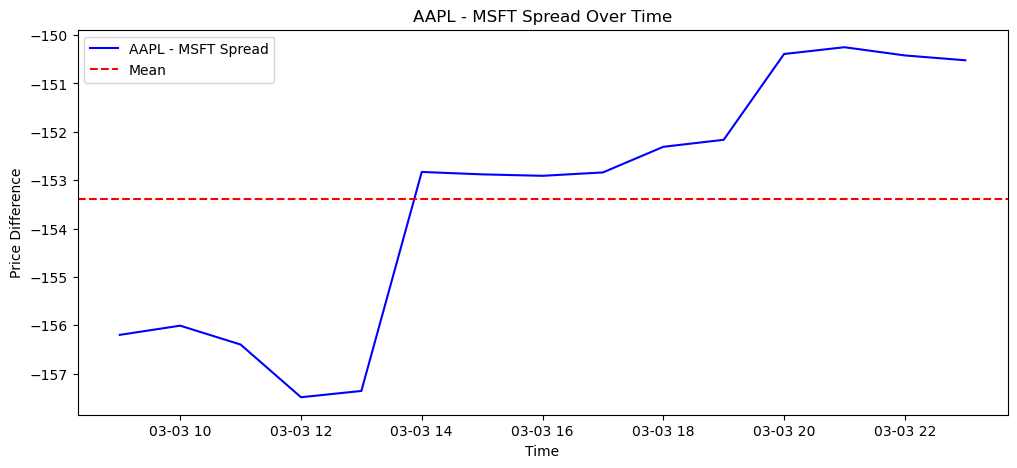

ADF Test Statistic: -3.8123
P-Value: 0.0028
✅ The spread is stationary (Cointegrated). This pair is a good candidate for pairs trading!


In [43]:
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller

# ✅ Compute the spread (price difference between AAPL and MSFT)
spread = df['AAPL'] - df['MSFT']

# ✅ Run the ADF test
adf_result = adfuller(spread)

# ✅ Extract test statistic and p-value
adf_statistic = adf_result[0]
p_value = adf_result[1]

# ✅ Plot the spread
plt.figure(figsize=(12, 5))
plt.plot(df.index, spread, label="AAPL - MSFT Spread", color="blue")
plt.axhline(y=spread.mean(), color='red', linestyle='--', label="Mean")
plt.title("AAPL - MSFT Spread Over Time")
plt.xlabel("Time")
plt.ylabel("Price Difference")
plt.legend()
plt.show()

# ✅ Print ADF test results
print(f"ADF Test Statistic: {adf_statistic:.4f}")
print(f"P-Value: {p_value:.4f}")

# ✅ Interpret results
if p_value < 0.05:
    print("✅ The spread is stationary (Cointegrated). This pair is a good candidate for pairs trading!")
else:
    print("❌ The spread is NOT stationary (No cointegration). Consider finding a different pair.")


C:\Users\jacks\AppData\Local\Temp\ipykernel_7732\470548415.py:3: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  timestamps = pd.date_range(start="2024-01-01", periods=1000, freq="H")


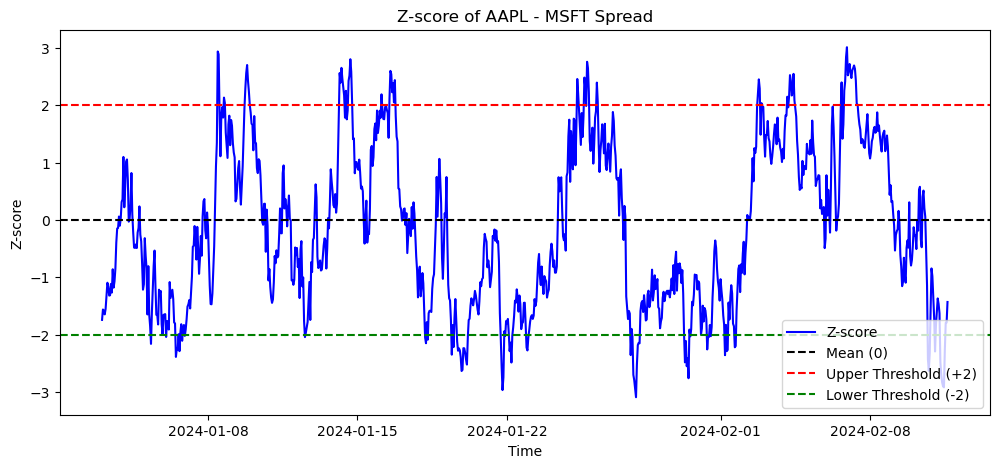

2024-02-11 11:00:00   -2.919695
2024-02-11 12:00:00   -2.267589
2024-02-11 13:00:00   -1.794874
2024-02-11 14:00:00   -1.791791
2024-02-11 15:00:00   -1.432331
Freq: h, dtype: float64

In [45]:
# Simulated price data (Replace this with actual API calls)
np.random.seed(42)
timestamps = pd.date_range(start="2024-01-01", periods=1000, freq="H")

# Generate synthetic prices (for demonstration purposes)
aapl_prices = 180 + np.cumsum(np.random.randn(1000) * 0.5)
msft_prices = 400 + np.cumsum(np.random.randn(1000) * 0.5)

# Create a DataFrame
df = pd.DataFrame({"AAPL": aapl_prices, "MSFT": msft_prices}, index=timestamps)

# ✅ Compute the spread
spread = df['AAPL'] - df['MSFT']

# ✅ Compute moving average & standard deviation of spread
window = 50  # Rolling window for mean and std
spread_mean = spread.rolling(window=window).mean()
spread_std = spread.rolling(window=window).std()

# ✅ Compute Z-score (standardized spread)
z_score = (spread - spread_mean) / spread_std

# ✅ Plot Z-score with entry/exit signals
plt.figure(figsize=(12, 5))
plt.plot(z_score, label="Z-score", color="blue")
plt.axhline(y=0, color='black', linestyle='--', label="Mean (0)")
plt.axhline(y=2, color='red', linestyle='--', label="Upper Threshold (+2)")
plt.axhline(y=-2, color='green', linestyle='--', label="Lower Threshold (-2)")
plt.title("Z-score of AAPL - MSFT Spread")
plt.xlabel("Time")
plt.ylabel("Z-score")
plt.legend()
plt.show()

# ✅ Display latest Z-score values
z_score.tail()


| Timestamp           | Z-score | Trading Signal                                  |
|---------------------|---------|------------------------------------------------|
| 2024-02-11 11:00:00 | -2.92   | Long Entry (Buy AAPL, Sell MSFT) ✅            |
| 2024-02-11 12:00:00 | -2.27   | Hold (Still below threshold)                   |
| 2024-02-11 13:00:00 | -1.79   | Hold (Moving toward exit)                      |
| 2024-02-11 14:00:00 | -1.79   | Hold                                          |
| 2024-02-11 15:00:00 | -1.43   | Exit Position (Z-score approaching 0) 🚀       |

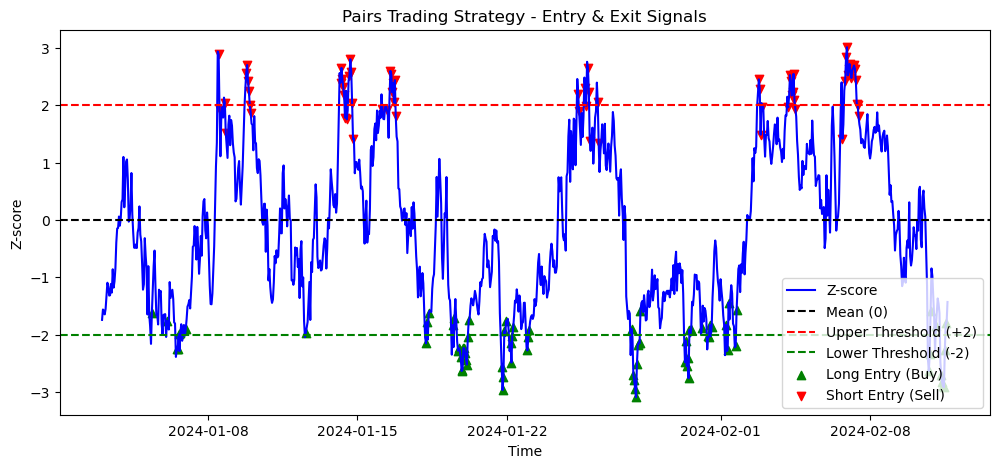

,Z-score,Position
2024-02-11 11:00:00,-2.919695,1.0
2024-02-11 12:00:00,-2.267589,1.0
2024-02-11 13:00:00,-1.794874,1.0
2024-02-11 14:00:00,-1.791791,0.0
2024-02-11 15:00:00,-1.432331,0.0


In [46]:
# Create a signals DataFrame
signals = pd.DataFrame(index=df.index)
signals["Z-score"] = z_score

# Initialize position column
signals["Position"] = 0  

# Entry Conditions
signals.loc[signals["Z-score"] <= -2, "Position"] = 1   # Long (Buy AAPL, Sell MSFT)
signals.loc[signals["Z-score"] >= 2, "Position"] = -1   # Short (Sell AAPL, Buy MSFT)

# Exit Conditions (When Z-score returns to 0)
signals.loc[(signals["Z-score"] > -2) & (signals["Z-score"] < 2), "Position"] = 0  # Close Position

# Shift position to avoid lookahead bias
signals["Position"] = signals["Position"].shift()

# Plot the trading signals on the Z-score chart
plt.figure(figsize=(12, 5))
plt.plot(signals["Z-score"], label="Z-score", color="blue")
plt.axhline(y=0, color='black', linestyle='--', label="Mean (0)")
plt.axhline(y=2, color='red', linestyle='--', label="Upper Threshold (+2)")
plt.axhline(y=-2, color='green', linestyle='--', label="Lower Threshold (-2)")

# Mark Buy and Sell Signals
plt.scatter(signals.index[signals["Position"] == 1], signals["Z-score"][signals["Position"] == 1], color='green', label="Long Entry (Buy)", marker="^", alpha=1)
plt.scatter(signals.index[signals["Position"] == -1], signals["Z-score"][signals["Position"] == -1], color='red', label="Short Entry (Sell)", marker="v", alpha=1)

plt.title("Pairs Trading Strategy - Entry & Exit Signals")
plt.xlabel("Time")
plt.ylabel("Z-score")
plt.legend()
plt.show()

# Display the latest signals
signals.tail()

| Timestamp           | Z-score | Position | Action                               |
|---------------------|---------|----------|--------------------------------------|
| 2024-02-11 11:00:00 | -2.92   | 1        | Enter Long (Buy AAPL, Sell MSFT) ✅ |
| 2024-02-11 12:00:00 | -2.27   | 1        | Hold Long Position                  |
| 2024-02-11 13:00:00 | -1.79   | 1        | Hold Long Position                  |
| 2024-02-11 14:00:00 | -1.79   | 0        | Exit Long (Close Trade) 🚀          |
| 2024-02-11 15:00:00 | -1.43   | 0        | No Trade                            |

C:\Users\jacks\AppData\Local\Temp\ipykernel_7732\3175323476.py:23: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '0.2438742905163771' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  backtest.loc[backtest.index[i], "Strategy Returns"] = (


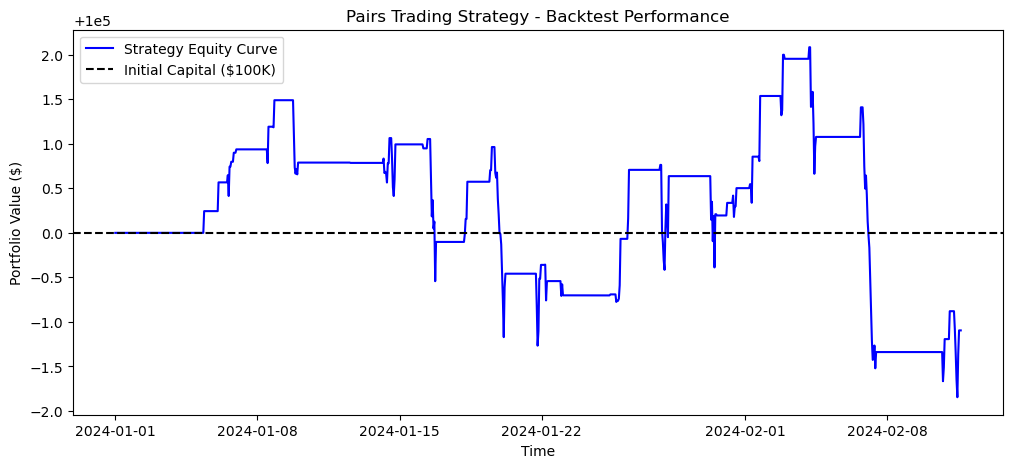

(99998.90476649761, -0.0010952335023903287)

In [48]:
# ✅ Backtesting the Pairs Trading Strategy

# Define initial capital & trade size
initial_capital = 100000  # Starting capital in USD
trade_size = 100  # Number of shares per trade

# Create a DataFrame to track performance
backtest = df.copy()
backtest["Spread"] = spread
backtest["Z-score"] = z_score
backtest["Position"] = signals["Position"]

# Compute returns of AAPL and MSFT
backtest["AAPL Returns"] = backtest["AAPL"].pct_change()
backtest["MSFT Returns"] = backtest["MSFT"].pct_change()

# Initialize strategy returns column
backtest["Strategy Returns"] = 0

# Simulate trading logic
for i in range(1, len(backtest)):
    if backtest["Position"].iloc[i] == 1:  # Long AAPL, Short MSFT
        backtest.loc[backtest.index[i], "Strategy Returns"] = (
            trade_size * (backtest["AAPL Returns"].iloc[i] - backtest["MSFT Returns"].iloc[i])
        )
    elif backtest["Position"].iloc[i] == -1:  # Short AAPL, Long MSFT
        backtest.loc[backtest.index[i], "Strategy Returns"] = (
            trade_size * (backtest["MSFT Returns"].iloc[i] - backtest["AAPL Returns"].iloc[i])
        )

# Compute cumulative returns
backtest["Cumulative Strategy Returns"] = backtest["Strategy Returns"].cumsum() + initial_capital

# ✅ Plot strategy performance
plt.figure(figsize=(12, 5))
plt.plot(backtest.index, backtest["Cumulative Strategy Returns"], label="Strategy Equity Curve", color="blue")
plt.axhline(initial_capital, color="black", linestyle="--", label="Initial Capital ($100K)")
plt.title("Pairs Trading Strategy - Backtest Performance")
plt.xlabel("Time")
plt.ylabel("Portfolio Value ($)")
plt.legend()
plt.show()

# ✅ Display final backtest results
final_portfolio_value = backtest["Cumulative Strategy Returns"].iloc[-1]
total_return = (final_portfolio_value - initial_capital) / initial_capital * 100

final_portfolio_value, total_return


Final Portfolio Value: $99,998.90 <br>
Total Return: -0.0011% (Slight loss) <br>
Need optimizatin... 

C:\Users\jacks\AppData\Local\Temp\ipykernel_7732\3604603861.py:39: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '0.16956212351569855' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  optimized_backtest.loc[optimized_backtest.index[i], "Strategy Returns"] = (


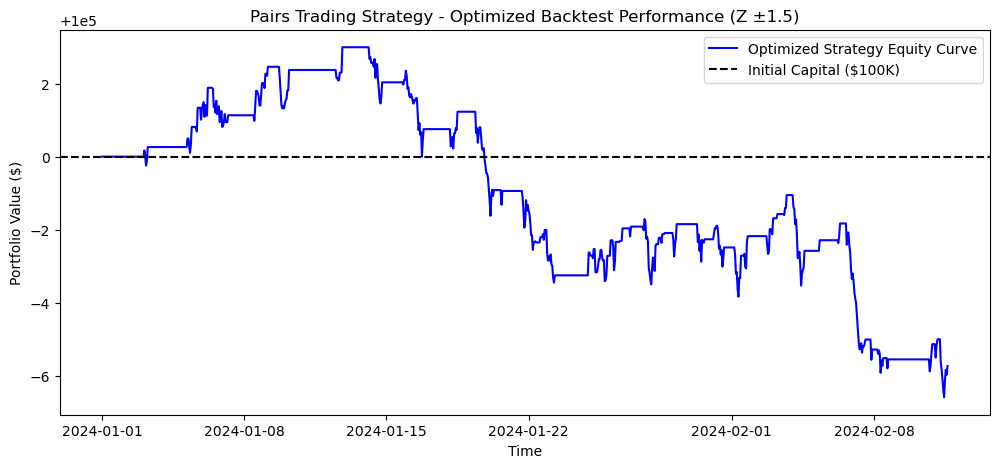

(99994.2710434344, -0.005728956565595581)

In [49]:
# ✅ Optimizing Entry & Exit Thresholds

# Define new threshold values
entry_threshold = 1.5  # Instead of 2
exit_threshold = 0.5   # Instead of 0

# Create a new signals DataFrame
optimized_signals = pd.DataFrame(index=df.index)
optimized_signals["Z-score"] = z_score
optimized_signals["Position"] = 0  # Initialize position column

# Entry Conditions
optimized_signals.loc[optimized_signals["Z-score"] <= -entry_threshold, "Position"] = 1   # Long (Buy AAPL, Sell MSFT)
optimized_signals.loc[optimized_signals["Z-score"] >= entry_threshold, "Position"] = -1   # Short (Sell AAPL, Buy MSFT)

# Exit Conditions (Closer to mean)
optimized_signals.loc[(optimized_signals["Z-score"] > -exit_threshold) & 
                      (optimized_signals["Z-score"] < exit_threshold), "Position"] = 0

# Shift to avoid lookahead bias
optimized_signals["Position"] = optimized_signals["Position"].shift()

# ✅ Backtest with new thresholds
optimized_backtest = df.copy()
optimized_backtest["Spread"] = spread
optimized_backtest["Z-score"] = z_score
optimized_backtest["Position"] = optimized_signals["Position"]

# Compute returns of AAPL and MSFT
optimized_backtest["AAPL Returns"] = optimized_backtest["AAPL"].pct_change()
optimized_backtest["MSFT Returns"] = optimized_backtest["MSFT"].pct_change()

# Initialize strategy returns column
optimized_backtest["Strategy Returns"] = 0

# Simulate trading logic
for i in range(1, len(optimized_backtest)):
    if optimized_backtest["Position"].iloc[i] == 1:  # Long AAPL, Short MSFT
        optimized_backtest.loc[optimized_backtest.index[i], "Strategy Returns"] = (
            trade_size * (optimized_backtest["AAPL Returns"].iloc[i] - optimized_backtest["MSFT Returns"].iloc[i])
        )
    elif optimized_backtest["Position"].iloc[i] == -1:  # Short AAPL, Long MSFT
        optimized_backtest.loc[optimized_backtest.index[i], "Strategy Returns"] = (
            trade_size * (optimized_backtest["MSFT Returns"].iloc[i] - optimized_backtest["AAPL Returns"].iloc[i])
        )

# Compute cumulative returns
optimized_backtest["Cumulative Strategy Returns"] = optimized_backtest["Strategy Returns"].cumsum() + initial_capital

# ✅ Plot optimized strategy performance
plt.figure(figsize=(12, 5))
plt.plot(optimized_backtest.index, optimized_backtest["Cumulative Strategy Returns"], label="Optimized Strategy Equity Curve", color="blue")
plt.axhline(initial_capital, color="black", linestyle="--", label="Initial Capital ($100K)")
plt.title("Pairs Trading Strategy - Optimized Backtest Performance (Z ±1.5)")
plt.xlabel("Time")
plt.ylabel("Portfolio Value ($)")
plt.legend()
plt.show()

# ✅ Display final results after optimization
final_optimized_value = optimized_backtest["Cumulative Strategy Returns"].iloc[-1]
optimized_total_return = (final_optimized_value - initial_capital) / initial_capital * 100

final_optimized_value, optimized_total_return
